In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from constants import LATIN_AMERICAN_COUNTRIES


In [71]:
file_path = '../../data/row_data/Consumo_de_energia_renovable.csv'
Data = pd.read_csv(file_path)
Data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Consumo de energía renovable (% del consumo to...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.000000,6.800000,8.600000,8.300000,9.100000,8.8,8.8,NaN,NaN,NaN
1,NaN,AFE,Consumo de energía renovable (% del consumo to...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,62.457688,61.891132,62.242631,63.387090,66.123449,NaN,NaN,NaN,NaN,NaN
2,Afganistán,AFG,Consumo de energía renovable (% del consumo to...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.200000,19.500000,18.300000,18.900000,18.200000,20.0,20.0,NaN,NaN,NaN
3,NaN,AFW,Consumo de energía renovable (% del consumo to...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,76.283383,76.413081,75.960030,75.328928,76.102819,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Consumo de energía renovable (% del consumo to...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,48.100000,52.500000,52.500000,51.000000,60.100000,52.9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Consumo de energía renovable (% del consumo to...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep. del",YEM,Consumo de energía renovable (% del consumo to...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.600000,3.000000,2.900000,3.000000,3.500000,3.7,NaN,NaN,NaN,NaN
263,Sudáfrica,ZAF,Consumo de energía renovable (% del consumo to...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.800000,7.900000,8.000000,8.700000,9.800000,9.7,NaN,NaN,NaN,NaN
264,Zambia,ZMB,Consumo de energía renovable (% del consumo to...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,84.000000,83.500000,83.800000,86.100000,85.400000,83.0,NaN,NaN,NaN,NaN


In [74]:
ConsumoLATAM.columns

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', '2024', 'Unnamed: 69'],
      dtype='object')

In [73]:
LAC = Data.groupby('Country Name') 
ConsumoLATAM = Data[Data['Country Name'].isin(LATIN_AMERICAN_COUNTRIES)]
ConsumoLATAM.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], inplace = True)
ConsumoLATAM

C:\Users\Julian\AppData\Local\Temp\ipykernel_21596\120708222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ConsumoLATAM.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], inplace = True)


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
9,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.4,10.4,10.5,10.7,9.8,9.2,NaN,NaN,NaN,NaN
28,Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.6,14.3,14.3,13.5,16.9,12.8,NaN,NaN,NaN,NaN
29,Brasil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.4,45.3,46.9,47.5,50.0,46.5,NaN,NaN,NaN,NaN
39,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,24.1,25.5,25.3,26.7,24.2,NaN,NaN,NaN,NaN
45,Colombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.5,32.2,30.4,31.5,32.0,29.7,NaN,NaN,NaN,NaN
48,Costa Rica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.1,33.3,33.1,33.4,36.4,34.2,NaN,NaN,NaN,NaN
50,Cuba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.2,22.0,24.0,23.1,24.5,20.9,NaN,NaN,NaN,NaN
59,República Dominicana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.3,16.9,15.9,14.4,16.0,14.8,NaN,NaN,NaN,NaN
66,Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.8,17.0,16.3,17.7,20.2,18.9,NaN,NaN,NaN,NaN
92,Guatemala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.2,65.0,64.0,62.8,65.5,62.1,NaN,NaN,NaN,NaN


In [77]:
Total_Energia = np.sum(ConsumoLATAM.select_dtypes(include = 'number'))
Total_Energia = Total_Energia.iloc[1:-4]
Total_Energia

C:\Users\Julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


1961      0.0
1962      0.0
1963      0.0
1964      0.0
1965      0.0
        ...  
2017    672.7
2018    677.8
2019    664.0
2020    726.7
2021    690.1
Length: 61, dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (20,) and arg 1 with shape (61,).

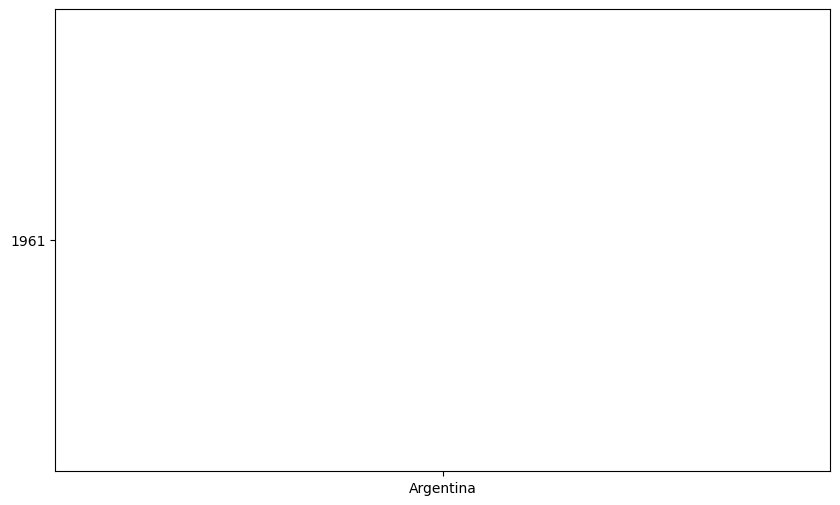

In [81]:
plt.figure(figsize=(10,6))
plt.bar(ConsumoLATAM['Country Name'], Total_Energia.index)
plt.title('Consumo de energía renovable (% del consumo total de energía final)')
plt.ylabel('Generación en TWh')
plt.grid()
plt.legend()